In [ ]:
# Install Kaggle package
!pip install kaggle

# Create Kaggle directory and copy API key
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

# Download the dataset from Kaggle
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

# Unzip the dataset
!unzip new-plant-diseases-dataset.zip

print('Data source import complete.')


Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/29050f21-a393-473e-9f9c-7fd99feef9a7___RS_HL 4533_180deg.JPG  
  inflating: new plant diseases dataset(augmented)/New

# Importing necessary libraries

In [ ]:
import os        # File and directory operations
import random    # Random number generation
import numpy as np  # Numerical computations
import pandas as pd # Data handling with DataFrames
import torch     # PyTorch for deep learning
import matplotlib.pyplot as plt  # Plotting graphs
from PIL import Image  # Working with images
from collections import defaultdict  # Handling dictionaries with default values

%matplotlib inline

from tensorflow.keras import models, layers  # Keras models and layers for neural networks
import tensorflow as tf  # TensorFlow for deep learning
from tensorflow import keras  # High-level API for building models
from tensorflow.keras import backend as K

# Setting Constants

In [ ]:
BATCH_SIZE = 32
EPOCHS = 25
IMAGE_SIZE = 256
default_image_size = (IMAGE_SIZE, IMAGE_SIZE)
image_size = 0

# Correct dataset path based on your extracted structure
data_dir = 'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
test_dir = 'test/test'

# Update train and validation directory paths
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'valid')

# List test images
if os.path.exists(test_dir):
    test_images = os.listdir(test_dir)
else:
    test_images = []

CHANNELS = 3
AUTOTUNE = tf.data.AUTOTUNE


# Exploratory Data Analysis

In [ ]:
def get_dataset(data_dir: str):
    return tf.keras.preprocessing.image_dataset_from_directory(
        data_dir,
        seed=123,
        image_size=default_image_size,
        batch_size=BATCH_SIZE
    )

# Loading datasets
train_ds = get_dataset(train_dir)
val_ds = get_dataset(val_dir)

print("✅ Datasets loaded with succes !")

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.
✅ Datasets loaded with succes !


### Checking the Available Classes

In [ ]:
class_names = train_ds.class_names
n_classes = len(class_names)
print("Number of train classes : ", n_classes,"\n", class_names)

Number of train classes :  38 
 ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_s

### Image Quality and Resolution

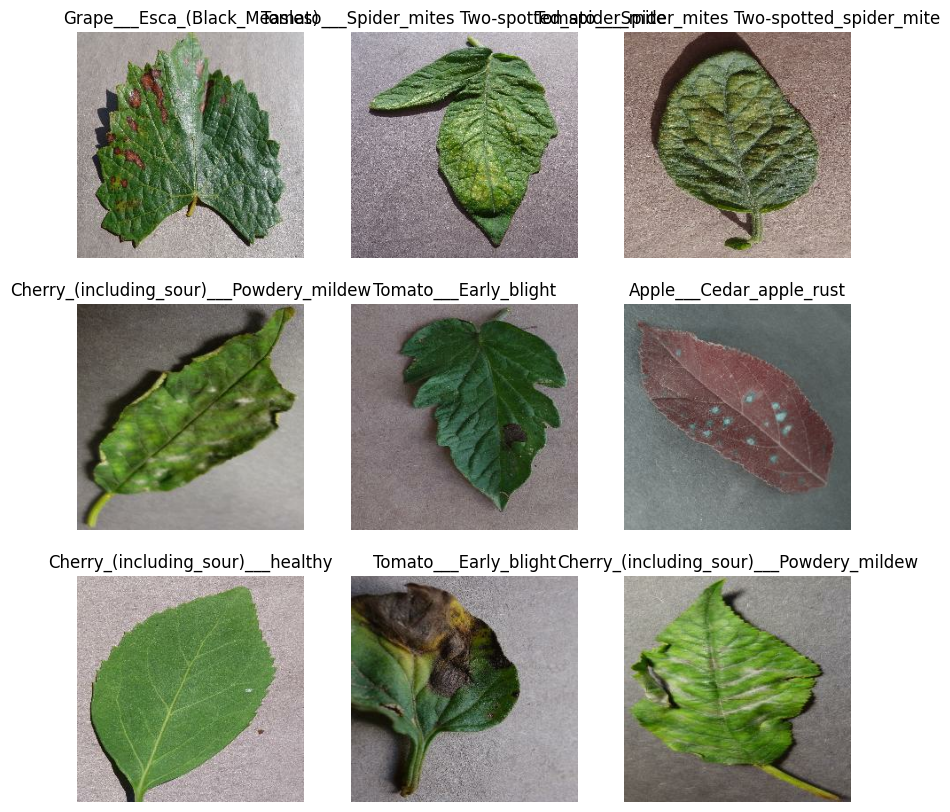

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#### Number of images for each plant

In [ ]:
# Count number of samples per class
class_counts = defaultdict(int)

for images, labels in train_ds:
    for label in labels.numpy():  # Convert tensor to numpy
        class_counts[class_names[label]] += 1

# Print class distribution
print("\n🔢 Number of images per class in training set:")
img_per_class = pd.DataFrame(class_counts.values(), index=class_counts.keys(), columns=["no. of images"])
img_per_class


🔢 Number of images per class in training set:


no. of images
Corn_(maize)___Northern_Leaf_Blight                          1908
Potato___healthy                                             1824
Tomato___Tomato_mosaic_virus                                 1790
Cherry_(including_sour)___healthy                            1826
Potato___Late_blight                                         1939
Corn_(maize)___Common_rust_                                  1907
Cherry_(including_sour)___Powdery_mildew                     1683
Pepper,_bell___healthy                                       1988
Tomato___Spider_mites Two-spotted_spider_mite                1741
Apple___healthy                                              2008
Corn_(maize)___healthy                                       1859
Peach___healthy                                              1728
Apple___Cedar_apple_rust                                     1760
Grape___healthy                                              1692
Tomato___healthy                                             1926
Tomato___Target_Spot                                         1827
Soybean___healthy                                            2022
Grape___Black_rot                                            1888
Peach___Bacterial_spot                                       1838
Tomato___Leaf_Mold                                           1882
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Grape___Esca_(Black_Measles)                                 1920
Tomato___Early_blight                                        1920
Strawberry___healthy                                         1824
Raspberry___healthy                                          1781
Tomato___Bacterial_spot                                      1702
Orange___Haunglongbing_(Citrus_greening)                     2010
Pepper,_bell___Bacterial_spot                                1913
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Apple___Black_rot                                            1987
Potato___Early_blight                                        1939
Strawberry___Leaf_scorch                                     1774
Tomato___Late_blight                                         1851
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Squash___Powdery_mildew                                      1736
Tomato___Septoria_leaf_spot                                  1745
Apple___Apple_scab                                           2016
Blueberry___healthy                                          1816

In [ ]:
plants = []
NumberOfDiseases = 0
for plant in class_counts.keys():
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [ ]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Unique Plants are: 
['Corn_(maize)', 'Potato', 'Tomato', 'Cherry_(including_sour)', 'Pepper,_bell', 'Apple', 'Peach', 'Grape', 'Soybean', 'Strawberry', 'Raspberry', 'Orange', 'Squash', 'Blueberry']
Number of plants: 14


In [ ]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


#### Visualizing the above information on a graph

Text(0.5, 1.0, 'Images per each class of plant disease')

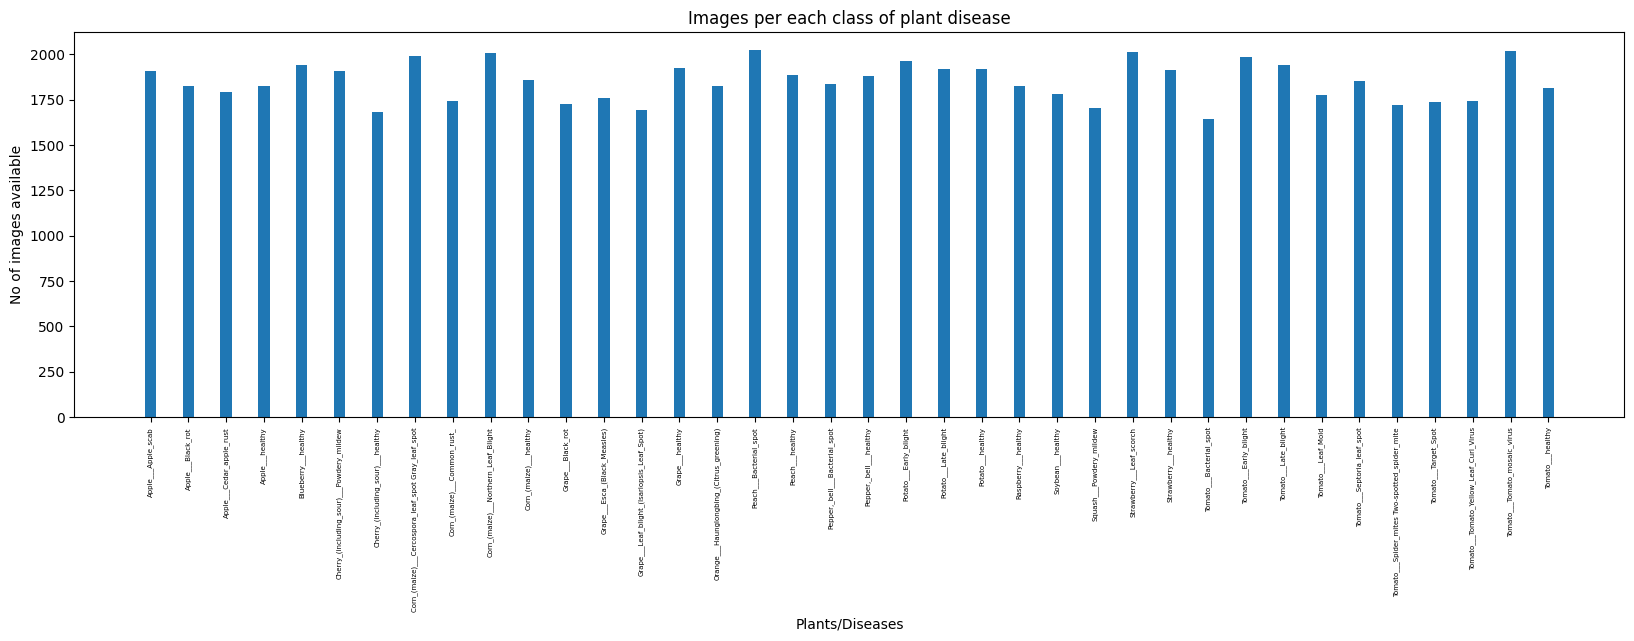

In [ ]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in class_counts.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, train_ds.class_names , fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [ ]:
imbalance_ratio = np.max(img_per_class) / np.min(img_per_class)
print("Class Imbalance Ratio:", imbalance_ratio)

Class Imbalance Ratio: 1.2314250913520097


#### Some Statistics

In [ ]:
print("Mean:", np.mean(img_per_class))
print("Median:", np.median(img_per_class))
print("Standard Deviation:", np.std(img_per_class))
print("Min:", np.min(img_per_class))
print("Max:", np.max(img_per_class))
print("90th Percentile:", np.percentile(img_per_class, 90))

Mean: 1849.8684210526317
Median: 1844.5
Standard Deviation: no. of images    104.323932
dtype: float64
Min: 1642
Max: 2022
90th Percentile: 1994.0


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


**Conclusion : The dataset appears to be nearly balanced across all classes, which means we can proceed confidently with the next steps.**

In [ ]:
num_images = sum(1 for _ in train_ds) * BATCH_SIZE
print(f"Total number of images: {num_images}")

Total number of images: 70304


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


# Modelling

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
batch_input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
chanDim = -1
if K.image_data_format() == "channels_first":
    input_shape = (CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    batch_input_shape = (BATCH_SIZE, CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    chanDim = 1

In [ ]:
base_model = tf.keras.applications.MobileNet(weights="imagenet",
                                             include_top=False,
                                             input_shape=input_shape)
base_model.trainable = False

# Model definition without explicit InputLayer
model = models.Sequential([
    tf.keras.Sequential([
      layers.Resizing(IMAGE_SIZE, IMAGE_SIZE,input_shape=input_shape),
      layers.Rescaling(1./255),
    ]),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

<ipython-input-21-73a0765db7a5>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNet(weights="imagenet",


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Summary of the model architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_224 (Functional)      │ (None, 8, 8, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,296,934 (12.58 MB)

 Trainable params: 68,070 (265.90 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
optimizer = tf.keras.optimizers.Adam()

model.compile(
    optimizer='rmsprop',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=EPOCHS,
                    steps_per_epoch=150,
                    validation_steps=100)

Epoch 1/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.3783 - loss: 2.5044 - val_accuracy: 0.7775 - val_loss: 0.7965
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.8385 - loss: 0.6248 - val_accuracy: 0.8950 - val_loss: 0.3959
Epoch 3/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.8869 - loss: 0.3981 - val_accuracy: 0.9125 - val_loss: 0.2991
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9038 - loss: 0.3058 - val_accuracy: 0.9266 - val_loss: 0.2436
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9210 - loss: 0.2622 - val_accuracy: 0.9187 - val_loss: 0.2461
Epoch 6/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9360 - loss: 0.2059 - val_accuracy: 0.9381 - val_loss: 0.1921
Epoch 7/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9352 - loss: 0.2062 - val_accuracy: 0.9362 - val_loss: 0.1887
Epoch 8/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9400 - loss: 0.1866 - val_

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.9420 - loss: 0.1753 - val_accuracy: 0.9466 - val_loss: 0.1708
Epoch 16/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 82s 151ms/step - accuracy: 0.9537 - loss: 0.1386 - val_accuracy: 0.9463 - val_loss: 0.1509
Epoch 17/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9560 - loss: 0.1370 - val_accuracy: 0.9600 - val_loss: 0.1099
Epoch 18/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9565 - loss: 0.1161 - val_accuracy: 0.9553 - val_loss: 0.1527
Epoch 19/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9576 - loss: 0.1188 - val_accuracy: 0.9575 - val_loss: 0.1220
Epoch 20/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9664 - loss: 0.1030 - val_accuracy: 0.9491 - val_loss: 0.1330
Epoch 21/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9641 - loss: 0.1005 - val_accuracy: 0.9619 - val_loss: 0.1168
Epoch 22/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9693 - loss: 0.0915 - val_accur

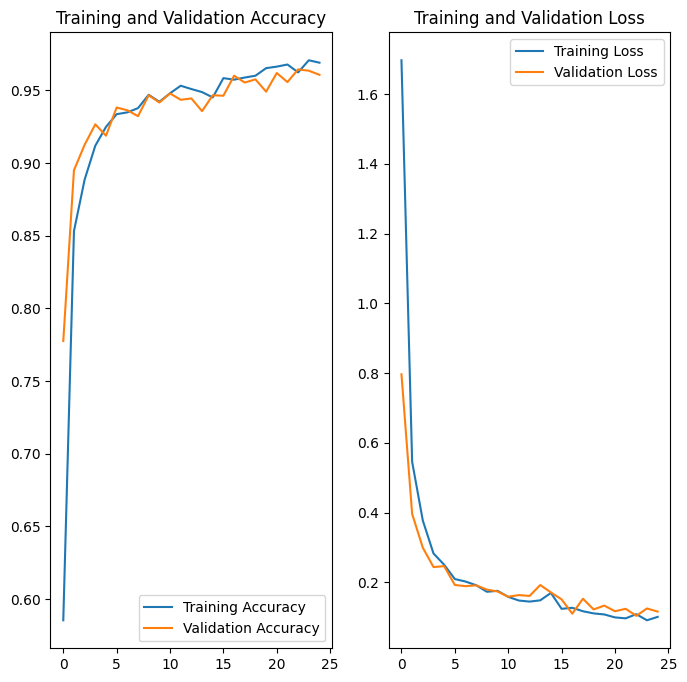

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# prompt: save the model in .keras format

# Save the model in .keras format
os.makedirs('models', exist_ok=True)

# Get the next available model version
model_version = max([int(i) for i in (os.listdir("models")+[0])]) + 1
model.save(f"models/{model_version}/plant_scan.keras")


In [ ]:
def predict(model, img):
    predictions = model.predict(img)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

In [ ]:
# Function to process image data (for images from file)
def process_image(img_path) -> np.ndarray:
    # Open image using PIL from file path
    image = Image.open(img_path)

    # Convert PIL Image to numpy array
    image_array = np.array(image)

    # Add batch dimension
    img_batch = np.expand_dims(image_array, axis=0)

    return img_batch

# Process all the test images
ptest_images = [process_image(os.path.join(test_dir, img)) for img in test_images]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


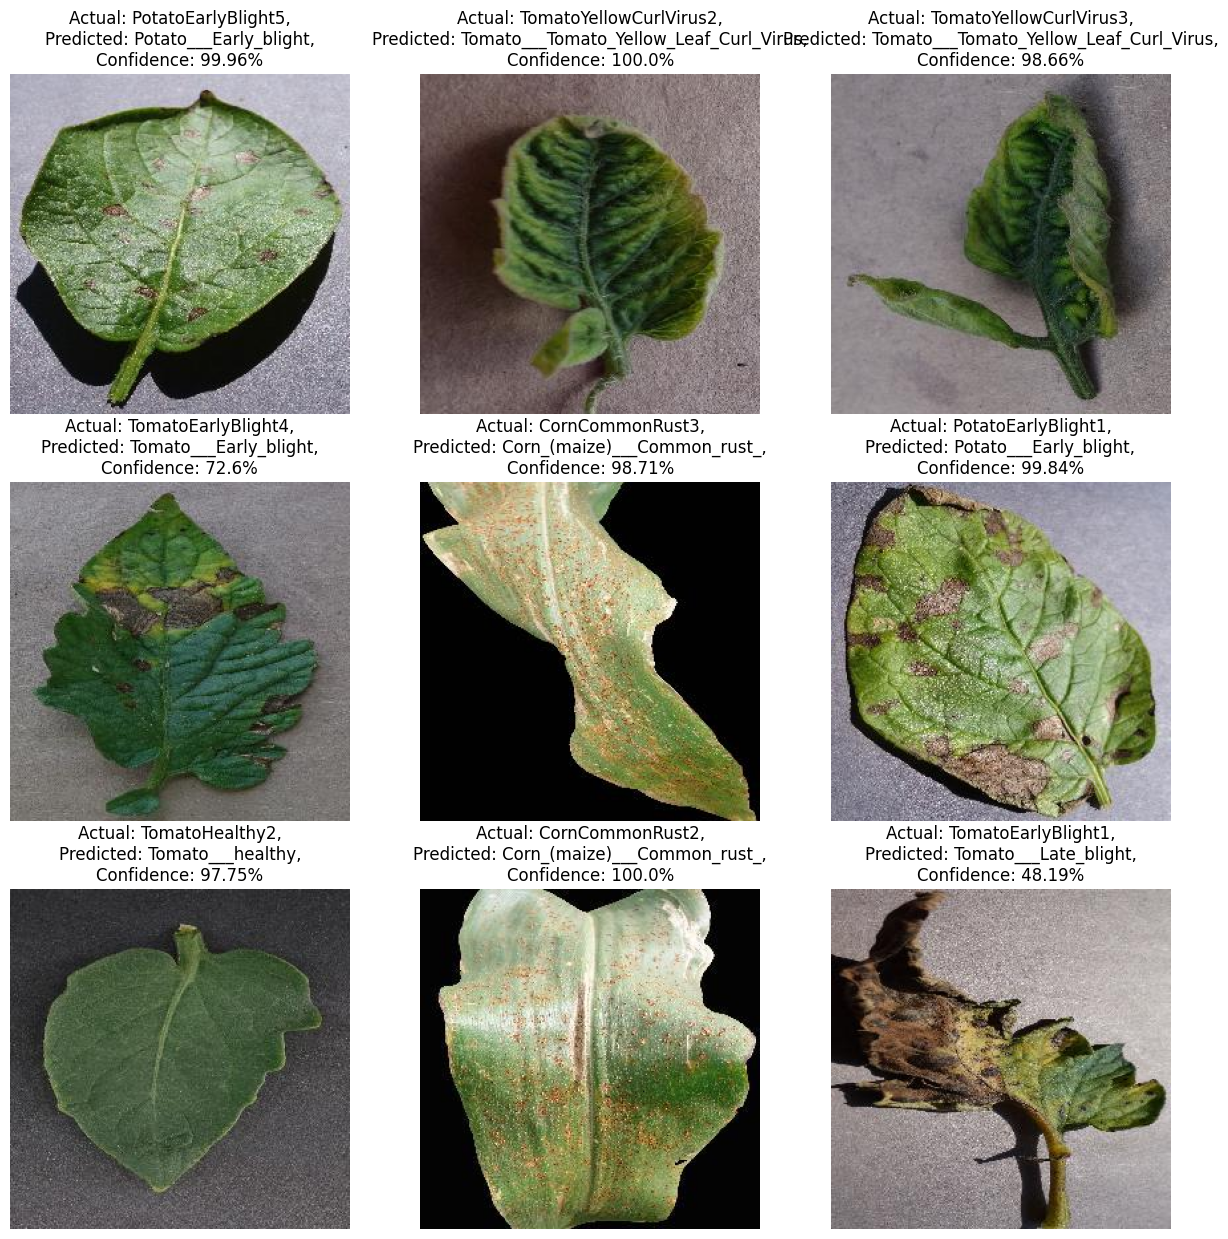

In [ ]:
# Predict for each image and display the results
plt.figure(figsize=(15, 15))
for i in range(9):  # Display the first 9 images
    ax = plt.subplot(3, 3, i + 1)
    # Display the image (first image in the batch)
    img_display = (ptest_images[i][0] ).astype("uint8")  # Rescale back to [0, 255] for display
    plt.imshow(img_display)

    # Predict the class and confidence
    predicted_class, confidence = predict(model, ptest_images[i])

    # Extract the actual class from the filename
    filename = test_images[i]
    actual_class = filename.split('.')[0].replace('_', ' ')

    # Set title with actual class, predicted class, and confidence
    plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class},\nConfidence: {confidence}%")
    plt.axis("off")

plt.show()

In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras

# # Load the model
# model = keras.models.load_model('plant_scan.h5')

# # Assuming 'uploaded_file' is the name of your uploaded file
# # Replace with the actual name if different
# uploaded_file = '/content/t.jpg'

# # Preprocess the uploaded image
# img = tf.keras.utils.load_img(uploaded_file, target_size=(256, 256))
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0)  # Create a batch

# # Make the prediction
# predictions = model.predict(img_array)

# # Define class_names
# class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


# # Get the predicted class and confidence
# predicted_class = class_names[np.argmax(predictions[0])]
# confidence = round(100 * np.max(predictions[0]), 2)

# print(f"Predicted Class: {predicted_class}")
# print(f"Confidence: {confidence}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: Tomato___healthy
Confidence: 95.4%


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load the model
model = keras.models.load_model('plant_scan.keras') # Assuming your model is saved here

# Assuming 'uploaded_file' is the name of your uploaded file
# Replace with the actual name if different
uploaded_file = '/content/TomatoHealthy3.jpg'

# Preprocess the uploaded image
img = tf.keras.utils.load_img(uploaded_file, target_size=(256, 256))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Make the prediction
predictions = model.predict(img_array)

# Define class_names (make sure this matches your training data)
class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

# Get the predicted class and confidence
predicted_class = class_names[np.argmax(predictions[0])]
confidence = round(100 * np.max(predictions[0]), 2)

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Class: Tomato___healthy
Confidence: 99.91%


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0
